### Autoregressive Model

#### AUTHOR: AVINASH VINAYAK BAGUL
UNIVERSITY OF ABERDEEN

##### IMPORTING REQUIRED LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
import time
from statsmodels.tsa.ar_model import AutoReg

##### READING DATASET 

In [4]:
df1 = pd.read_csv('iqr_benchmark.csv', parse_dates=['Time_stamp'], index_col=['Time_stamp'])
df1

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
Time_stamp,,,,,,,,,,,,,
2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


##### UNIVARIATE DATA FOR AUTOREGRESSIVE MODEL - FOR 1 SENSE-BOX (BERNEM)

In [8]:
df = df1.drop(df1.iloc[:,2:], axis = 1)
df = df[df['boxName'] == 'Bernem']
df = df.drop(df.iloc[:,0:1], axis = 1 )
df

,PM 2.5
Time_stamp,
2018-12-31 18:30:53,139.63
2018-12-31 18:35:01,136.43
2018-12-31 18:39:09,112.67
2018-12-31 18:43:17,46.87
2018-12-31 18:47:24,38.30
...,...
2020-02-28 18:11:12,3.93
2020-02-28 18:14:31,4.33
2020-02-28 18:21:01,3.93


##### BENCHMARK DATASET FOR 1 SENSE-BOX (BERNEM)

In [9]:
bernem = df1[df1['boxName']=='Bernem']
bernem = bernem.iloc[:,:]
bernem = bernem.drop(bernem.iloc[:,0:1], axis = 1)
bernem_anml = bernem[bernem['label']=='abnormal']
print('anomalies in bernem ', len(bernem_anml))

anomalies in bernem  8807


##### IMPLEMENTING ALGORITHM 

Streaming output truncated to the last 5000 lines.
actual=2.200000, expected=2.720253
actual=2.400000, expected=2.703527
actual=2.270000, expected=2.762006
actual=2.100000, expected=2.729079
actual=2.630000, expected=2.665417
actual=1.900000, expected=2.817531
actual=2.300000, expected=2.626290
actual=3.000000, expected=2.675890
actual=2.030000, expected=2.963481
actual=2.200000, expected=2.798894
actual=1.970000, expected=2.728678
actual=1.630000, expected=2.601931
actual=2.600000, expected=2.382898
actual=1.830000, expected=2.630650
actual=1.970000, expected=2.478309
actual=3.870000, expected=2.456694
actual=2.570000, expected=3.188877
actual=1.800000, expected=3.147963
actual=2.230000, expected=2.843597
actual=2.230000, expected=2.789923
actual=2.230000, expected=2.707714
actual=2.100000, expected=2.681940
actual=2.600000, expected=2.573554
actual=2.100000, expected=2.722097
actual=2.270000, expected=2.693328
actual=2.500000, expected=2.671323
actual=2.170000, expected=2.785002
actu

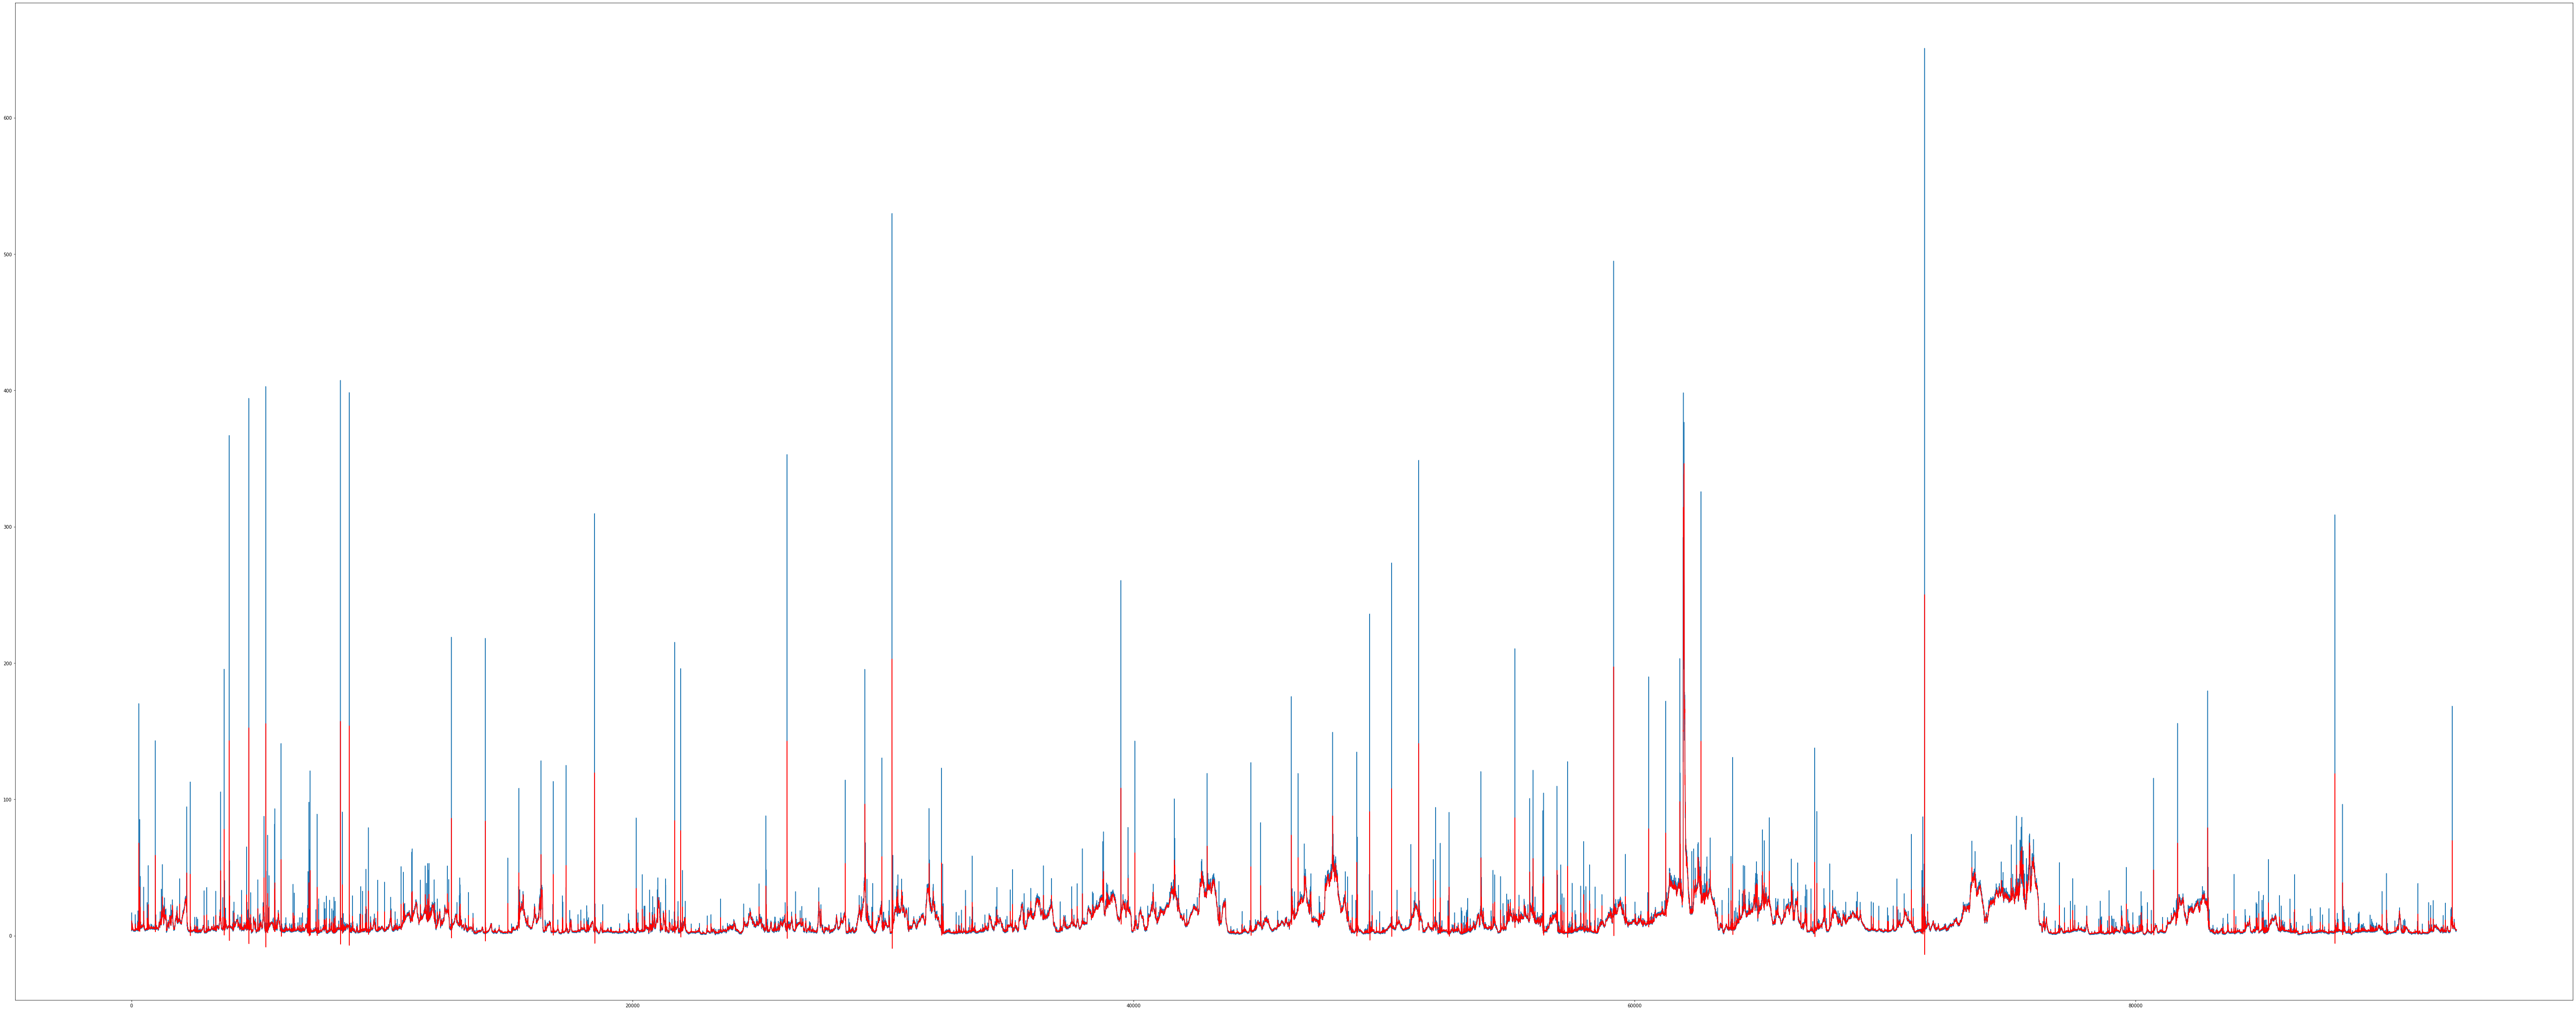

In [10]:
start = time.time()
# split dataset
X = df.values
train, test = X[1:len(X)-92808], X[len(X)-92808:]
# train autoregression
window = 24
model = AutoReg(train, lags=24)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = []
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('actual=%f, expected=%f' % (obs,yhat))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
print("--- %s seconds ---" % (time.time() - start))
# plot
plt.figure(figsize=(100,40))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [11]:
pred_list = []
for x in predictions:
    pred_list.append(x[0])
    
dframe = df.iloc[len(X)-92808:,:]
dframe['prediction'] = pred_list
dframe

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PM 2.5,prediction
Time_stamp,,
2019-07-23 20:10:35,3.67,4.705378
2019-07-23 20:14:45,3.87,4.372310
2019-07-23 20:18:51,3.95,4.228718
2019-07-23 20:22:58,4.03,4.167557
2019-07-23 20:27:05,3.55,4.211623
...,...,...
2020-02-28 18:11:12,3.93,4.055401
2020-02-28 18:14:31,4.33,4.171675
2020-02-28 18:21:01,3.93,4.317109


##### SEPARATING INSTANCES WHERE ACTUAL_VALUE > EXPECTED VALUE

In [12]:
anomalous = []
for i in range(0,len(dframe)):
    temp_list = []
    ind = dframe.index[i]
    val = dframe.values[i]
    
    if val[0] > val[1] :
     
        temp_list.append(ind)
        temp_list.append(val[0])
        temp_list.append(val[1])
        anomalous.append(temp_list)

In [13]:
suspects = pd.DataFrame(anomalous,columns=['Time_stamp','actual','expected'])
suspects = suspects.set_index(suspects.iloc[:,0])
suspects = suspects.drop(suspects.iloc[:,0:1], axis = 1)
suspects

,actual,expected
Time_stamp,,
2019-07-23 20:56:22,10.78,4.353831
2019-07-23 21:00:15,16.83,6.908586
2019-07-23 21:25:05,4.73,4.529736
2019-07-23 21:33:24,5.00,4.255467
2019-07-23 21:37:34,4.97,4.662017
...,...,...
2020-02-28 17:42:21,4.60,4.209851
2020-02-28 17:50:21,4.03,3.922751
2020-02-28 18:00:41,4.17,4.099184


##### z-score Method

In [14]:
def detect_outlier(data):
    #print(type(data))
    outliers=[]
    threshold=2
    data_1 = data
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
      
      
    for y in data_1:
        if std_1 == 0:
            z_score = (y-mean_1)/1
        
        else:
            z_score = (y - mean_1)/std_1 
        
        
        
        if np.abs(z_score) > threshold:
            outliers.append('abnormal')
        else:
            outliers.append('normal')
    
    
    #data['labels'] == outliers
    
    return outliers

##### IQR method

In [15]:
def get_label(data):
    
  
    #outlier_datapoints = detect_outlier(data['PM 2.5'])
    #print("\n\n##########################################\n Number of Z-score Outliers in PM 2.5 are: " , outlier_datapoints,'\n##########################################\n\n')

    

  ### outliers with 25 and 75 quartile method:

    sorted_val = sorted(data)

    q1, q3 = np.percentile(sorted_val,[25,75])
    qr = q3-q1

    lower_bound = q1 - (1.5 * qr)
    upper_bound = q3 + (1.5 * qr)

    otl = 0

    for i in sorted_val:
        if i > upper_bound:
            otl +=1
    #print('Number of outliers using quartile method\n')
    #print('\nlower bound: ', lower_bound, 'and Upper bound: ', upper_bound)
    #print(otl,' Number of outliers from ', len(sorted_val),'PM 2.5 values')

  

    ### taking upper bound from quartilemethod as our upper limit and everyting beyond that point is anomalous behaviour in that period.

    label_dict = []
    #x = data['PM 2.5'].values
    x = data
    #print(x)

    for i in x :
        if i > upper_bound + 8 or i < lower_bound:
            label_dict.append('abnormal')
        else:
            label_dict.append('normal')

    #data['label'] = label_dict
  
    return label_dict

In [16]:
#anomaly_list = detect_outlier(suspects['actual'])
anomaly_list = get_label(suspects['actual'])
suspects['label'] = anomaly_list
suspects.groupby('label').count()

,actual,expected
label,,
abnormal,473,473
normal,32686,32686


In [17]:
suspects

,actual,expected,label
Time_stamp,,,
2019-07-23 20:56:22,10.78,4.353831,normal
2019-07-23 21:00:15,16.83,6.908586,normal
2019-07-23 21:25:05,4.73,4.529736,normal
2019-07-23 21:33:24,5.00,4.255467,normal
2019-07-23 21:37:34,4.97,4.662017,normal
...,...,...,...
2020-02-28 17:42:21,4.60,4.209851,normal
2020-02-28 17:50:21,4.03,3.922751,normal
2020-02-28 18:00:41,4.17,4.099184,normal


In [18]:
result = pd.merge(dframe, suspects, left_on='Time_stamp', right_index=True,how='left', sort=False);

In [19]:
result

,PM 2.5,prediction,actual,expected,label
Time_stamp,,,,,
2019-07-23 20:10:35,3.67,4.705378,NaN,NaN,NaN
2019-07-23 20:14:45,3.87,4.372310,NaN,NaN,NaN
2019-07-23 20:18:51,3.95,4.228718,NaN,NaN,NaN
2019-07-23 20:22:58,4.03,4.167557,NaN,NaN,NaN
2019-07-23 20:27:05,3.55,4.211623,NaN,NaN,NaN
...,...,...,...,...,...
2020-02-28 18:11:12,3.93,4.055401,NaN,NaN,NaN
2020-02-28 18:14:31,4.33,4.171675,4.33,4.171675,normal
2020-02-28 18:21:01,3.93,4.317109,NaN,NaN,NaN


In [20]:
result = result.drop(result.iloc[:,2:4], axis = 1)
result["label"].fillna("normal", inplace = True) 
result

,PM 2.5,prediction,label
Time_stamp,,,
2019-07-23 20:10:35,3.67,4.705378,normal
2019-07-23 20:14:45,3.87,4.372310,normal
2019-07-23 20:18:51,3.95,4.228718,normal
2019-07-23 20:22:58,4.03,4.167557,normal
2019-07-23 20:27:05,3.55,4.211623,normal
...,...,...,...
2020-02-28 18:11:12,3.93,4.055401,normal
2020-02-28 18:14:31,4.33,4.171675,normal
2020-02-28 18:21:01,3.93,4.317109,normal


In [21]:
result.groupby('label').count()

,PM 2.5,prediction
label,,
abnormal,473,473
normal,92335,92335


In [22]:
bernem_test = bernem.iloc[len(X)-92808:,:]

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

obt_label = result['label']
gold_label = bernem_test['label']
testy = obt_label
yhat_classes = gold_label

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes, pos_label = 'abnormal')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes, pos_label = 'abnormal')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes, pos_label = 'abnormal')
print('F1 score: %f' % f1)

Accuracy: 0.954066
Precision: 0.047301
Recall: 0.418605
F1 score: 0.084997
